<a href="https://colab.research.google.com/github/abdullatif14/Supervised-and-Unsupervise-with-R/blob/main/Unsupervised_R_Core_IP_week13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Defining the Question

##Specifying the Question
The brand’s Sales and Marketing team would like to understand their customer’s behavior from data that they have collected over the past year. More specifically, they would like to learn the characteristics of customer groups.

##Defining the metrix for success

1. Descriptive Statistics

2. K means

3. Predictive Analysis

##Understanding the context 

Kira Plastinina is a Russian brand that is sold through a defunct chain of retail stores in Russia, Ukraine, Kazakhstan, Belarus, China, Philippines, and Armenia. The brand’s Sales and Marketing team would like to understand their customer’s behavior from data that they have collected over the past year. More specifically, they would like to learn the characteristics of customer groups.

##Recording the experimental design

• EDA

• Checking and Data cleaning

• Implement the Solution(Knn, Decision Trees,SVM, Naive Bayes)

• Challenge the Solution

##Check Data


In [1]:
library(tidyverse)
library(ggplot2)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.1     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
# reading the csv file into the data frame
online_shop <- read.csv('/content/online_shoppers_intention.csv')
head(online_shop)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<chr>,<lgl>,<lgl>
1,0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
2,0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
3,0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
4,0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,Feb,3,2,2,4,Returning_Visitor,FALSE,FALSE
5,0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,Feb,3,3,1,4,Returning_Visitor,TRUE,FALSE
6,0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,Feb,2,2,1,3,Returning_Visitor,FALSE,FALSE


In [3]:
# dimension (number of rows and columns)
dim(online_shop) 

[1] 12330    18

In [4]:
# checking the class of the data
class(online_shop) 

[1] "data.frame"

In [5]:
str(online_shop)

'data.frame':	12330 obs. of  18 variables:
 $ Administrative         : int  0 0 0 0 0 0 0 1 0 0 ...
 $ Administrative_Duration: num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ Informational          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Informational_Duration : num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ ProductRelated         : int  1 2 1 2 10 19 1 1 2 3 ...
 $ ProductRelated_Duration: num  0 64 -1 2.67 627.5 ...
 $ BounceRates            : num  0.2 0 0.2 0.05 0.02 ...
 $ ExitRates              : num  0.2 0.1 0.2 0.14 0.05 ...
 $ PageValues             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SpecialDay             : num  0 0 0 0 0 0 0.4 0 0.8 0.4 ...
 $ Month                  : chr  "Feb" "Feb" "Feb" "Feb" ...
 $ OperatingSystems       : int  1 2 4 3 3 2 2 1 2 2 ...
 $ Browser                : int  1 2 1 2 3 2 4 2 2 4 ...
 $ Region                 : int  1 1 9 2 1 1 3 1 2 1 ...
 $ TrafficType            : int  1 2 3 4 4 3 3 5 3 2 ...
 $ VisitorType            : chr  "Returning_Visitor" "Returning_Visitor" "Returning

**Data Cleaning**

In [6]:
# lets check for missing data
length(which(is.na(online_shop)))

[1] 112

In [7]:
# missing values in any of the columns
colSums(is.na(online_shop))

# They have uniform missing values we will drop them

Administrative Administrative_Duration           Informational 
                     14                      14                      14 
 Informational_Duration          ProductRelated ProductRelated_Duration 
                     14                      14                      14 
            BounceRates               ExitRates              PageValues 
                     14                      14                       0 
             SpecialDay                   Month        OperatingSystems 
                      0                       0                       0 
                Browser                  Region             TrafficType 
                      0                       0                       0 
            VisitorType                 Weekend                 Revenue 
                      0                       0                       0

In [8]:
clean_online <- na.omit(online_shop)
colSums(is.na(clean_online))

Administrative Administrative_Duration           Informational 
                      0                       0                       0 
 Informational_Duration          ProductRelated ProductRelated_Duration 
                      0                       0                       0 
            BounceRates               ExitRates              PageValues 
                      0                       0                       0 
             SpecialDay                   Month        OperatingSystems 
                      0                       0                       0 
                Browser                  Region             TrafficType 
                      0                       0                       0 
            VisitorType                 Weekend                 Revenue 
                      0                       0                       0

In [9]:
clean_online <- na.omit(online_shop)
dim(clean_online)


[1] 12316    18

In [10]:
# checking for duplicates
duplicated <- online_shop[duplicated(online_shop),]
length(duplicated)

# We are not going to drop the duplicates since they are significant in our anlysis

[1] 18

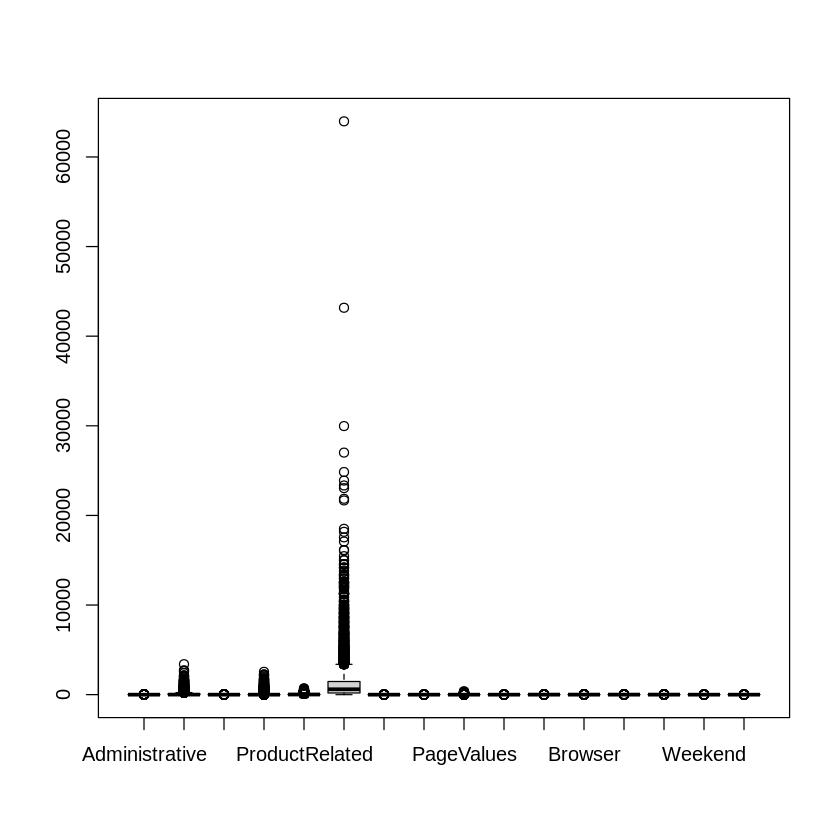

In [11]:
# outliers/ anomalies
clean_online<- online_shop[, !sapply(online_shop, is.character)]

boxplot(clean_online, maintainer="Boxplots")


**Univariate Analysis**

In [12]:
summary(clean_online)

 Administrative   Administrative_Duration Informational   
 Min.   : 0.000   Min.   :  -1.00         Min.   : 0.000  
 1st Qu.: 0.000   1st Qu.:   0.00         1st Qu.: 0.000  
 Median : 1.000   Median :   8.00         Median : 0.000  
 Mean   : 2.318   Mean   :  80.91         Mean   : 0.504  
 3rd Qu.: 4.000   3rd Qu.:  93.50         3rd Qu.: 0.000  
 Max.   :27.000   Max.   :3398.75         Max.   :24.000  
 NA's   :14       NA's   :14              NA's   :14      
 Informational_Duration ProductRelated   ProductRelated_Duration
 Min.   :  -1.00        Min.   :  0.00   Min.   :   -1.0        
 1st Qu.:   0.00        1st Qu.:  7.00   1st Qu.:  185.0        
 Median :   0.00        Median : 18.00   Median :  599.8        
 Mean   :  34.51        Mean   : 31.76   Mean   : 1196.0        
 3rd Qu.:   0.00        3rd Qu.: 38.00   3rd Qu.: 1466.5        
 Max.   :2549.38        Max.   :705.00   Max.   :63973.5        
 NA's   :14             NA's   :14       NA's   :14             
  Bounce

In [13]:
install.packages("Hmisc")
library(Hmisc)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘png’, ‘jpeg’, ‘checkmate’, ‘htmlwidgets’, ‘Formula’, ‘latticeExtra’, ‘gridExtra’, ‘htmlTable’, ‘viridis’


Loading required package: lattice

Loading required package: survival

Loading required package: Formula


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:base’:

    format.pval, units




In [14]:
# checking for the descriptive stats
describe(clean_online)

clean_online 

 16  Variables      12330  Observations
--------------------------------------------------------------------------------
Administrative 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   12316       14       27    0.895    2.318    3.177        0        0 
     .25      .50      .75      .90      .95 
       0        1        4        7        9 

lowest :  0  1  2  3  4, highest: 22 23 24 26 27
--------------------------------------------------------------------------------
Administrative_Duration 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   12316       14     3336    0.892    80.91    124.9      0.0      0.0 
     .25      .50      .75      .90      .95 
     0.0      8.0     93.5    225.1    348.9 

lowest :   -1.000000    0.000000    1.333333    2.000000    3.000000
highest: 2407.423810 2629.253968 2657.318056 2720.500000 3398.750000
-----------------------------------------------------------------------------

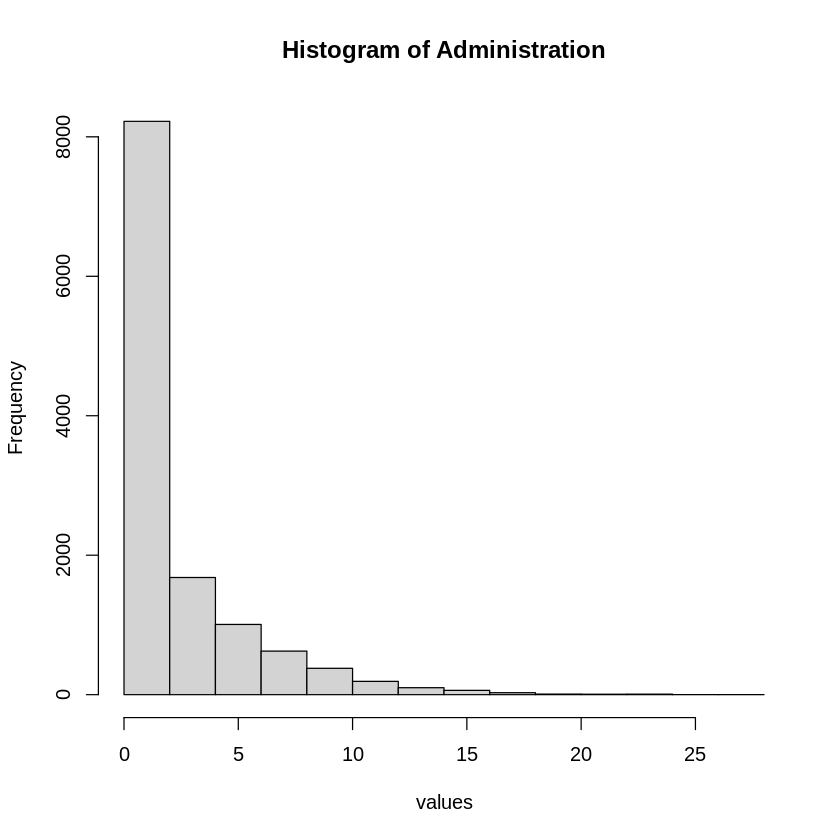

In [15]:
hist(clean_online$Administrative,
     main = "Histogram of Administration",
     xlab = "values")

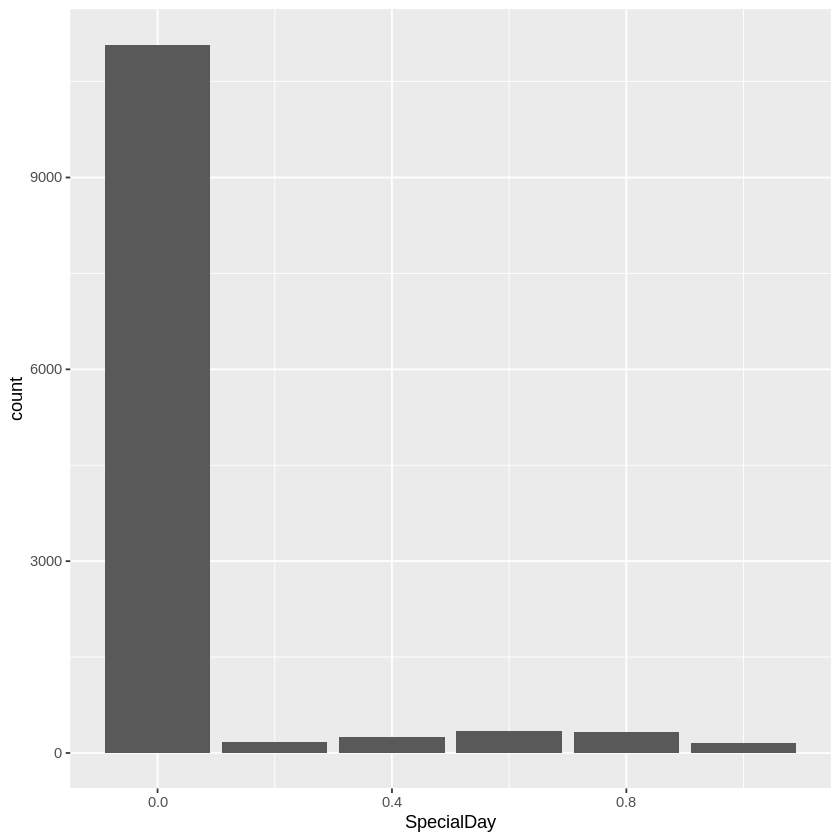

In [16]:
# plot the distribution of special day
ggplot(clean_online, aes(x = SpecialDay)) + 
  geom_bar()

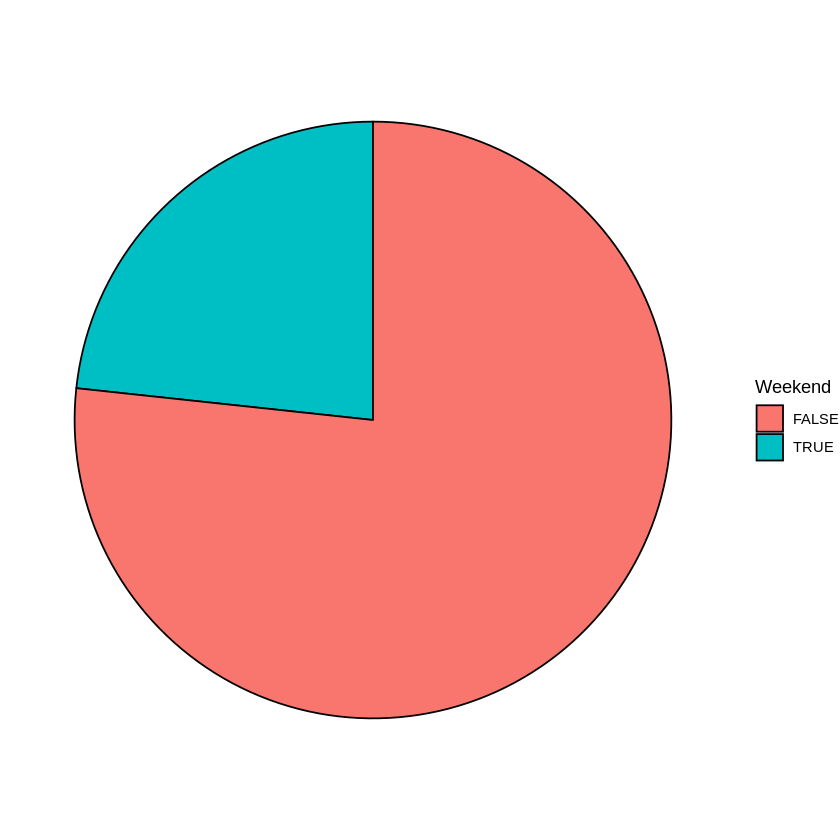

In [17]:
# plot the distribution of informational
 plotdata <- clean_online %>%
    count(Weekend) %>%
    arrange(desc(Weekend)) %>%
    mutate(prop = round(n * 100 / sum(n), 1),
           lab.ypos = cumsum(prop) - 0.5  *prop)
  
  ggplot(plotdata, 
         aes(x = "", 
             y = prop, 
             fill = Weekend)) +
    geom_bar(width = 1, 
             stat = "identity", 
             color = "black") +
    coord_polar("y", 
                start = 0, 
                direction = -1) +
    theme_void()


Warning message:
“Removed 14 rows containing non-finite values (stat_density).”


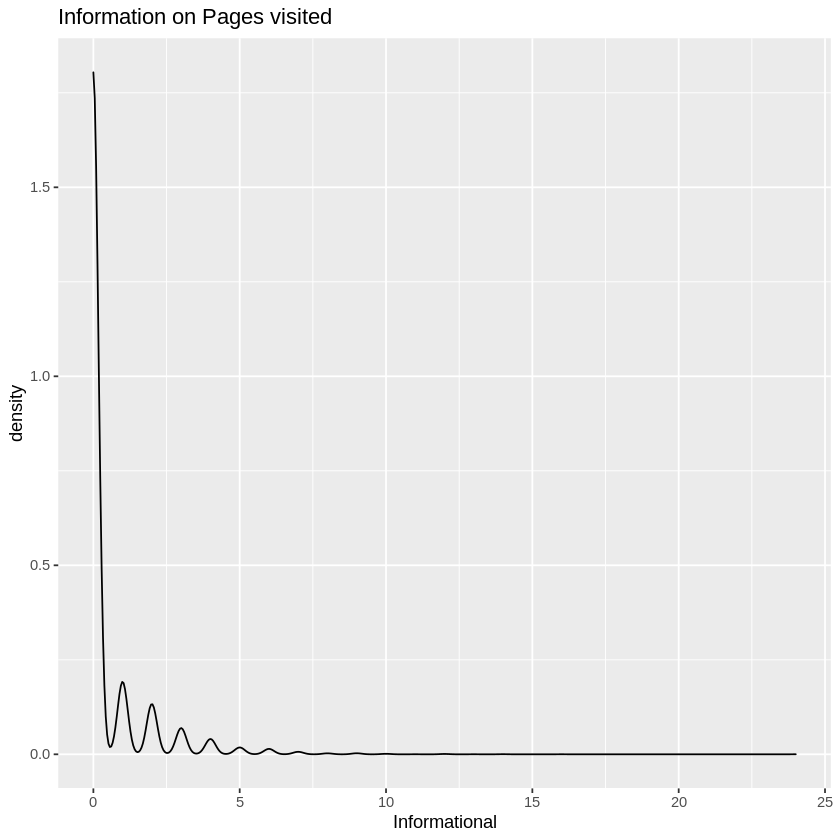

In [18]:
# Create a kernel density plot of age
ggplot(clean_online, aes(x = Informational)) +
  geom_density() + 
  labs(title = "Information on Pages visited")

**Bivariate Analysis**

In [19]:
# Run the one-way ANOVA model
aov(Administrative ~ Informational , data=clean_online)

Call:
   aov(formula = Administrative ~ Informational, data = clean_online)

Terms:
                Informational Residuals
Sum of Squares       19302.38 116663.76
Deg. of Freedom             1     12314

Residual standard error: 3.077999
Estimated effects may be unbalanced
14 observations deleted due to missingness

In [20]:
cor(clean_online, use = "complete.obs")

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.000000000,0.601466169,0.376781907,0.255756989,0.43083240,0.373646961,-0.223473560,-0.316192240,0.09877121,-0.095053675,-0.0064586209,-0.025242556,-0.0056801453,-0.033748280,0.0264038579,0.138630798
Administrative_Duration,0.601466169,1.000000000,0.302646624,0.237958597,0.28886939,0.355238452,-0.144128305,-0.205618430,0.06746252,-0.073472322,-0.0074249582,-0.015524938,-0.0056814919,-0.014487243,0.0149874042,0.093394587
Informational,0.376781907,0.302646624,1.000000000,0.618965149,0.37409771,0.387446219,-0.116070836,-0.163538534,0.04853883,-0.048328300,-0.0094346325,-0.038256506,-0.0294416154,-0.034510398,0.0355572541,0.095085342
Informational_Duration,0.255756989,0.237958597,0.618965149,1.000000000,0.27996566,0.347300028,-0.074076704,-0.105204635,0.03078687,-0.030658253,-0.0095963728,-0.019345803,-0.0272439452,-0.024731100,0.0240539055,0.070250375
ProductRelated,0.430832402,0.288869393,0.374097712,0.279965656,1.00000000,0.860868160,-0.204469070,-0.292219420,0.05606696,-0.024190256,0.0041926903,-0.013326336,-0.0383184855,-0.043234908,0.0160971316,0.158279703
ProductRelated_Duration,0.373646961,0.355238452,0.387446219,0.347300028,0.86086816,1.000000000,-0.184408837,-0.251644747,0.05262267,-0.036597833,0.0028854280,-0.007548789,-0.0332634039,-0.036537625,0.0072934190,0.152130339
BounceRates,-0.223473560,-0.144128305,-0.116070836,-0.074076704,-0.20446907,-0.184408837,1.000000000,0.913436421,-0.11935658,0.073087784,0.0239651524,-0.016008912,-0.0067311280,0.078893793,-0.0468700082,-0.150620637
ExitRates,-0.316192240,-0.205618430,-0.163538534,-0.105204635,-0.29221942,-0.251644747,0.913436421,1.000000000,-0.17439706,0.102898838,0.0147454291,-0.004406660,-0.0088360816,0.078997689,-0.0629416324,-0.206886041
PageValues,0.098771209,0.067462517,0.048538829,0.030786866,0.05606696,0.052622675,-0.119356581,-0.174397064,1.00000000,-0.063659707,0.0184655450,0.045510494,0.0112329559,0.012471041,0.0119931294,0.492494434
SpecialDay,-0.095053675,-0.073472322,-0.048328300,-0.030658253,-0.02419026,-0.036597833,0.073087784,0.102898838,-0.06365971,1.000000000,0.0126089756,0.003411774,-0.0161880593,0.052273011,-0.0167922978,-0.082467853


Warning message:
“Removed 14 rows containing missing values (geom_point).”


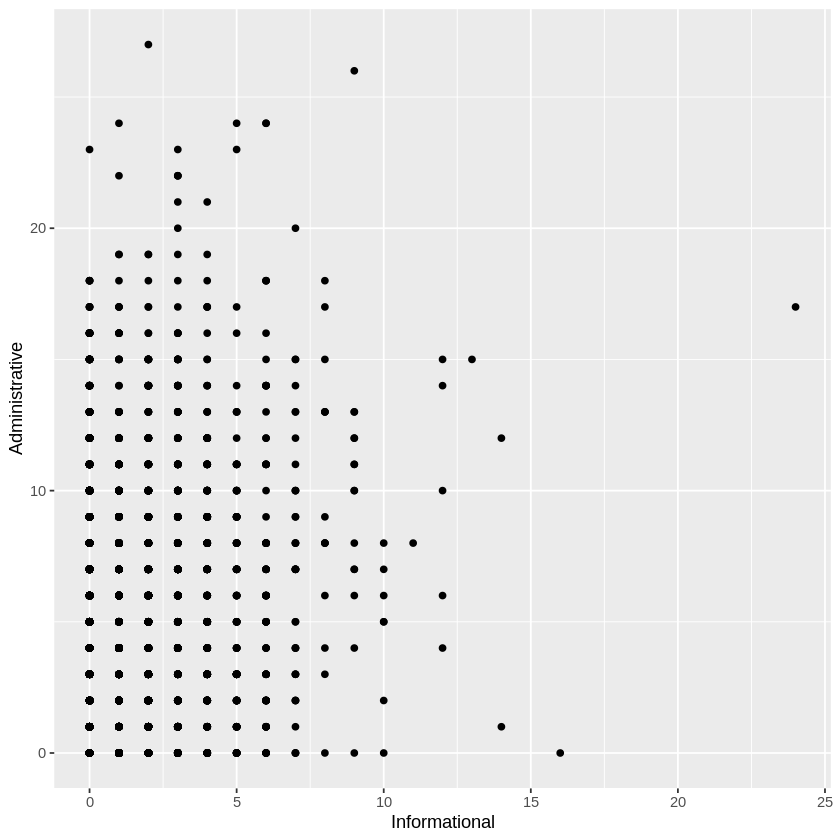

In [21]:

ggplot(clean_online, aes(x = Informational, y = Administrative)) + geom_point()

Warning message:
“Removed 14 rows containing missing values (geom_point).”


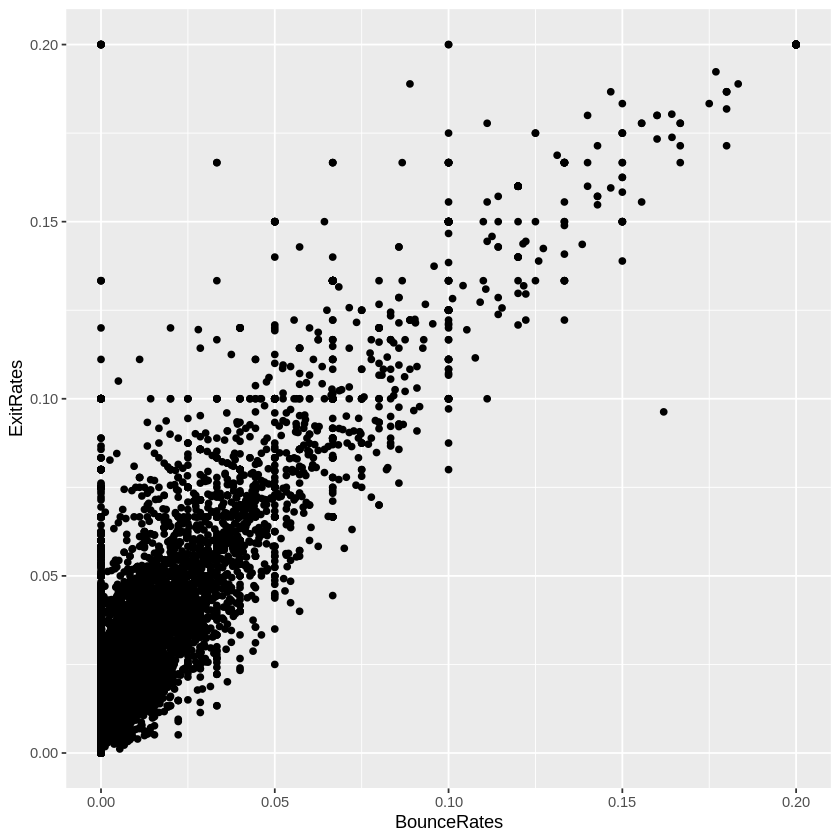

In [22]:

ggplot(clean_online, aes(x = BounceRates, y = ExitRates)) + geom_point()

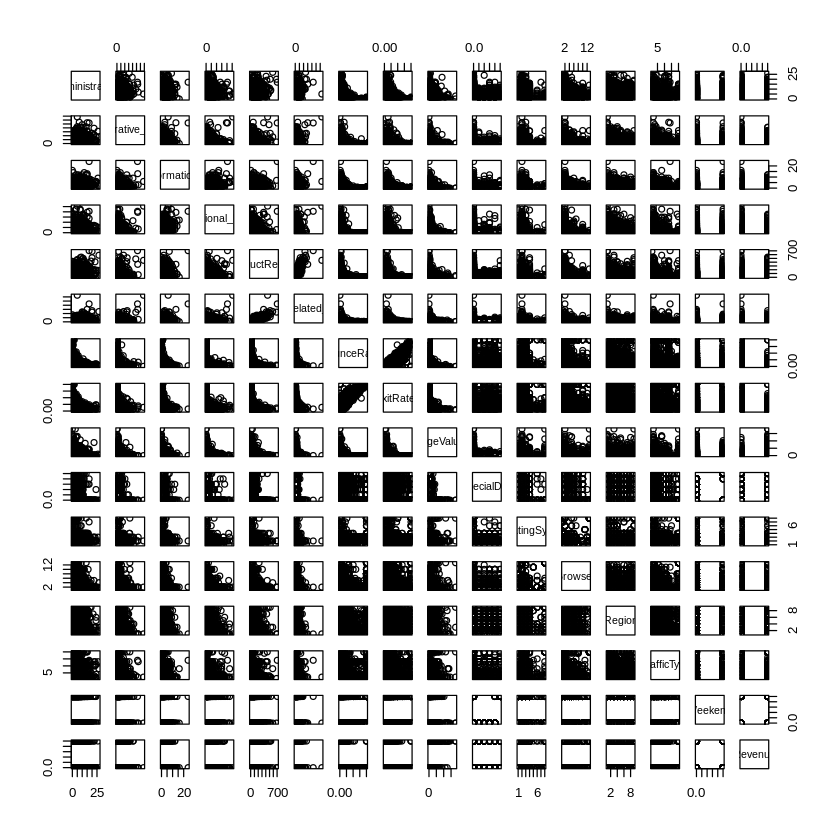

In [23]:
pairs(clean_online)

In [24]:
cov(clean_online, use = "complete.obs")

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,11.04069336,353.459826,1.590858944,119.6759610,63.6901467,2.376764e+03,-3.595945e-02,-5.098419e-02,6.09713438,-6.285832e-02,-0.0195625758,-1.440993e-01,-4.533867e-02,-4.513072e-01,0.0370693276,0.166678152
Administrative_Duration,353.45982649,31279.612416,68.015825905,5926.7051209,2272.9921112,1.202755e+05,-1.234436e+00,-1.764732e+00,221.66159096,-2.586129e+00,-1.1970513001,-4.717271e+00,-2.413816e+00,-1.031190e+01,1.1199696361,5.976861134
Informational,1.59085894,68.015826,1.614681693,110.7620272,21.1492139,9.425000e+02,-7.142583e-03,-1.008439e-02,1.14585583,-1.222195e-02,-0.0109283983,-8.351779e-02,-8.987031e-02,-1.764883e-01,0.0190906547,0.043719764
Informational_Duration,119.67596098,5926.705121,110.762027207,19831.8156453,1754.0893636,9.362946e+04,-5.051863e-01,-7.189559e-01,80.54599322,-8.592594e-01,-1.2319027323,-4.680564e+00,-9.216423e+00,-1.401674e+01,1.4312516016,3.579733253
ProductRelated,63.69014669,2272.992111,21.149213940,1754.0893636,1979.3902863,7.332107e+04,-4.405367e-01,-6.309006e-01,46.34148681,-2.141913e-01,0.1700382287,-1.018607e+00,-4.095295e+00,-7.741458e+00,0.3025961232,2.548072156
ProductRelated_Duration,2376.76409600,120275.480302,942.499952306,93629.4573503,73321.0730543,3.664822e+06,-1.709609e+01,-2.337763e+01,1871.52912683,-1.394368e+01,5.0352930916,-2.482755e+01,-1.529693e+02,-2.815070e+02,5.8993852916,105.381180733
BounceRates,-0.03595945,-1.234436,-0.007142583,-0.5051863,-0.4405367,-1.709609e+01,2.345187e-03,2.146610e-03,-0.10738220,7.044160e-04,0.0010579301,-1.331928e-03,-7.830468e-04,1.537638e-02,-0.0009590315,-0.002639332
ExitRates,-0.05098419,-1.764732,-0.010084391,-0.7189559,-0.6309006,-2.337763e+01,2.146610e-03,2.354899e-03,-0.15722533,9.937846e-04,0.0006522763,-3.673888e-04,-1.030047e-03,1.542847e-02,-0.0012905454,-0.003632772
PageValues,6.09713438,221.661591,1.145855832,80.5459932,46.3414868,1.871529e+03,-1.073822e-01,-1.572253e-01,345.13932663,-2.353735e-01,0.3127140695,1.452576e+00,5.013055e-01,9.324432e-01,0.0941410180,3.310696190
SpecialDay,-0.06285832,-2.586129,-0.012221954,-0.8592594,-0.2141913,-1.394368e+01,7.044160e-04,9.937846e-04,-0.23537348,3.960877e-02,0.0022875129,1.166558e-03,-7.739299e-03,4.186930e-02,-0.0014120658,-0.005938833


##Implementing the Solution


In [25]:
# Applying the lm() function.
multiple_lm <- lm(Informational ~ ., clean_online)

In [26]:
anova(multiple_lm)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Administrative,1,2.822938e+03,2822.9384965,3197.1673267,0.000000e+00
Administrative_Duration,1,1.800743e+02,180.0743479,203.9462858,6.689826e-46
Informational_Duration,1,5.657273e+03,5657.2726191,6407.2409648,0.000000e+00
ProductRelated,1,3.426225e+02,342.6225007,388.0429794,4.492797e-85
ProductRelated_Duration,1,1.571763e+00,1.5717625,1.7801266,1.821585e-01
BounceRates,1,8.510352e-01,0.8510352,0.9638544,3.262370e-01
ExitRates,1,6.587226e-01,0.6587226,0.7460475,3.877473e-01
PageValues,1,4.225887e-01,0.4225887,0.4786100,4.890657e-01
SpecialDay,1,1.934501e+00,1.9345014,2.1909526,1.388490e-01


In [27]:
set.seed(1234)

# Randomizing the rows, creates a uniform distribution of 150
random <- runif(150)
random_data <- clean_online[order(random),]

# Selecting the first 6 rows from random
head(random_data)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<lgl>,<lgl>
7,0,-1.00000,0,-1,1,-1.000,0.200000000,0.200000000,0,0.4,2,4,3,3,FALSE,FALSE
64,0,0.00000,0,0,14,706.500,0.000000000,0.007142857,0,0.0,2,2,5,4,TRUE,FALSE
73,0,0.00000,0,0,2,43.000,0.000000000,0.100000000,0,0.4,2,2,3,3,FALSE,FALSE
98,0,0.00000,0,0,4,105.000,0.000000000,0.025000000,0,0.6,1,1,1,4,FALSE,FALSE
101,3,18.33333,0,0,38,2635.178,0.000000000,0.008947368,0,0.4,2,4,1,2,FALSE,FALSE
110,6,326.25000,4,94,128,5062.214,0.000854701,0.017918470,0,0.0,2,5,1,3,FALSE,FALSE


In [29]:
install.packages('caret')
library(caret)


# Normalizing the dataframe
preproc2 <- preProcess(random_data[,c(1:16)], method=c("range"))
 
norm <- predict(preproc2, random_data[,c(1:16)])
 
summary(norm)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘gower’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘plyr’, ‘ModelMetrics’, ‘reshape2’, ‘recipes’, ‘pROC’



Attaching package: ‘caret’


The following object is masked from ‘package:survival’:

    cluster


The following object is masked from ‘package:purrr’:

    lift




 Administrative    Administrative_Duration Informational    
 Min.   :0.00000   Min.   :0.0000000       Min.   :0.00000  
 1st Qu.:0.00000   1st Qu.:0.0009934       1st Qu.:0.00000  
 Median :0.00000   Median :0.0009934       Median :0.00000  
 Mean   :0.04833   Mean   :0.0201836       Mean   :0.02333  
 3rd Qu.:0.00000   3rd Qu.:0.0009934       3rd Qu.:0.00000  
 Max.   :1.00000   Max.   :1.0000000       Max.   :1.00000  
 Informational_Duration ProductRelated     ProductRelated_Duration
 Min.   :0.000000       Min.   :0.000000   Min.   :0.000000       
 1st Qu.:0.008264       1st Qu.:0.007874   1st Qu.:0.005555       
 Median :0.008264       Median :0.039370   Median :0.030167       
 Mean   :0.030634       Mean   :0.080525   Mean   :0.072252       
 3rd Qu.:0.008264       3rd Qu.:0.102362   3rd Qu.:0.082986       
 Max.   :1.000000       Max.   :1.000000   Max.   :1.000000       
  BounceRates       ExitRates         PageValues        SpecialDay    
 Min.   :0.0000   Min.   :0.00000

###K-Means

In [30]:
# Create the k-means model: km.out
km.out <- kmeans(norm, centers = 3, nstart = 20)

# Inspect the result
summary(km.out)

             Length Class  Mode   
cluster      150    -none- numeric
centers       48    -none- numeric
totss          1    -none- numeric
withinss       3    -none- numeric
tot.withinss   1    -none- numeric
betweenss      1    -none- numeric
size           3    -none- numeric
iter           1    -none- numeric
ifault         1    -none- numeric

In [31]:
km_cluster <- kmeans(na.omit(norm), 3)
km_cluster
km_cluster$withinss
km_cluster$tot.withinss/km_cluster$betweenss

K-means clustering with 3 clusters of sizes 17, 111, 22

Cluster means:
  Administrative Administrative_Duration Informational Informational_Duration
1     0.02450980            0.0043825477    0.00000000            0.006806028
2     0.06156156            0.0264786558    0.03153153            0.039312039
3     0.00000000            0.0006321493    0.00000000            0.005259204
  ProductRelated ProductRelated_Duration BounceRates ExitRates PageValues
1    0.040296434             0.031040189   0.3661765 0.4827689 0.01903897
2    0.102220331             0.092813700   0.0488657 0.2195195 0.02432523
3    0.002147459             0.000353021   0.9734848 0.9808891 0.00000000
  SpecialDay OperatingSystems   Browser    Region TrafficType Weekend
1  0.2823529        0.2549020 0.1666667 0.2058824   0.3823529       1
2  0.2252252        0.3213213 0.2117117 0.1993243   0.3063063       0
3  0.1909091        0.3181818 0.1893939 0.2500000   0.2651515       0
     Revenue
1 0.05882353
2 0.01801802
3

[1] 15.406308 56.282685  6.401272

[1] 1.812791

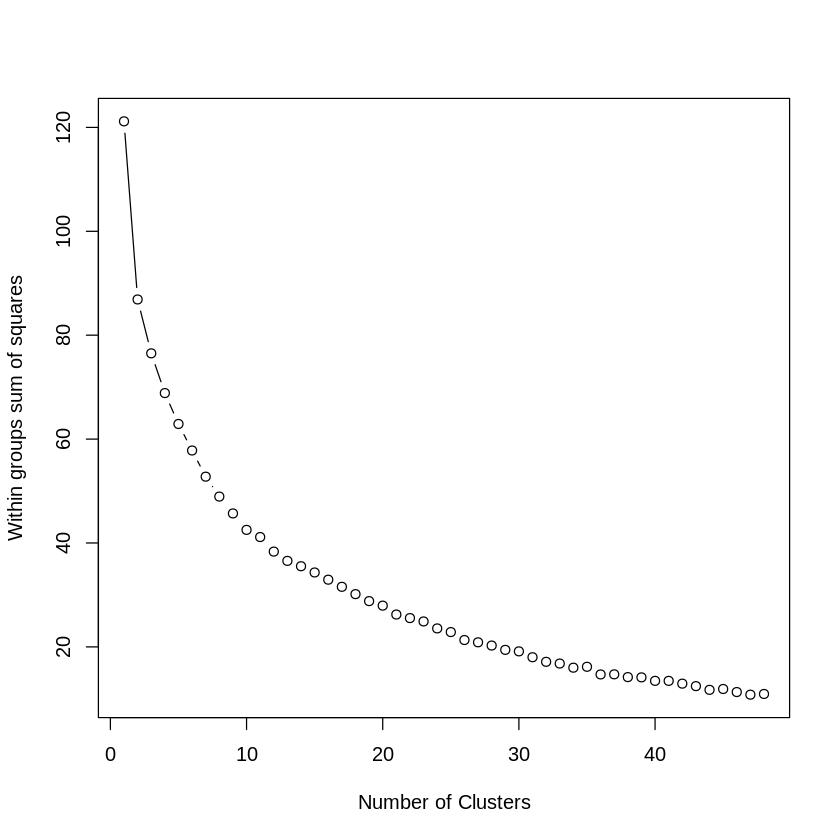

In [32]:
# Initialize total within sum of squares error: wss
wss <- 0

# For 1 to 48 cluster centers
for (i in 1:48) {
  km.out <- kmeans(norm, centers = i, nstart = 20)
  # Save total within sum of squares to wss variable
  wss[i] <- km.out$tot.withinss
}

# Plot total within sum of squares vs. number of clusters
plot(1:48, wss, type = "b", 
     xlab = "Number of Clusters", 
     ylab = "Within groups sum of squares")

##kNN

In [35]:
install.packages("ISLR")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [36]:
library(ISLR)

smp_siz = floor(0.75*nrow(norm))  
# creates a value for dividing the data into train and test. In this case the value is defined as 75% of the number of rows in the dataset
smp_siz  # shows the value of the sample size

[1] 112

In [37]:
set.seed(123)   # set seed to ensure you always have same random numbers generated
train_ind = sample(seq_len(nrow(norm)),size = smp_siz) 
# Randomly identifies therows equal to sample size ( defined in previous instruction) from  all the rows of Smarket dataset and stores the row number in train_ind
train=norm[train_ind,] #creates the training dataset with row numbers stored in train_ind
test=norm[-train_ind,]  # creates the test dataset excluding the row numbers mentioned in train_ind

In [38]:
# in order to classify the test data point.
# Lets build a model on it; cl is the class of the training data set and k is the no of neighbours to look for 
# in order to classify it accordingly.

library(class)    
require(class)
model <- knn(train= train,test=test, ,cl= train_ind,k=13)
table(factor(model))


# the test sp model is also known as confusion matrix table# Import ggplot2 because diamonds dataset is in ggplot2 package
library(ggplot2)

# Loading the dataset
norm
 
# Storing it as data frame
dia <- data.frame(norm)


 12  13  17  20  25  26  32  47  60  67  72  75  82  88  92  93 102 104 107 108 
  1   1   1   1   1   1   1   1   2   2   2   1   2   1   1   1   2   2   1   1 
109 121 122 126 130 133 137 139 140 147 
  1   1   1   1   2   1   1   1   1   2 

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>
7,0.00000000,0.0000000000,0.00,0.000000000,0.000000000,0.0000000000,1.000000000,1.00000000,0,0.4,0.3333333,0.5000000,0.250,0.3333333,FALSE,FALSE
64,0.00000000,0.0009933775,0.00,0.008264463,0.102362205,0.1017550448,0.000000000,0.02698207,0,0.0,0.3333333,0.1666667,0.500,0.5000000,TRUE,FALSE
73,0.00000000,0.0009933775,0.00,0.008264463,0.007874016,0.0063282289,0.000000000,0.49547219,0,0.4,0.3333333,0.1666667,0.250,0.3333333,FALSE,FALSE
98,0.00000000,0.0009933775,0.00,0.008264463,0.023622047,0.0152452788,0.000000000,0.11707633,0,0.6,0.0000000,0.0000000,0.000,0.5000000,FALSE,FALSE
101,0.25000000,0.0192052980,0.00,0.008264463,0.291338583,0.3791440112,0.000000000,0.03608633,0,0.4,0.3333333,0.5000000,0.000,0.1666667,FALSE,FALSE
110,0.50000000,0.3250827813,1.00,0.785123967,1.000000000,0.7282085404,0.004273505,0.08134804,0,0.0,0.3333333,0.6666667,0.000,0.3333333,FALSE,FALSE
24,0.00000000,0.0009933775,0.00,0.008264463,0.007874016,0.0023011742,0.000000000,0.49547219,0,0.8,0.3333333,0.5000000,0.000,0.3333333,FALSE,FALSE
62,0.00000000,0.0009933775,0.00,0.008264463,0.055118110,0.0577882360,0.250000000,0.60058215,0,0.0,0.0000000,0.0000000,0.000,0.3333333,FALSE,FALSE
30,0.08333333,0.0069536424,0.25,0.008264463,0.346456693,0.2277802858,0.217391305,0.24735174,1,0.4,0.6666667,0.1666667,0.000,0.0000000,FALSE,FALSE


In [44]:
# Import ggplot2 because diamonds dataset is in ggplot2 package
library(ggplot2)

# Loading the diamonds dataset
head(norm)
# Storing it as data frame
dia <- data.frame(norm)

# Creating a random number equal 90% of total number of rows
ran <- sample(1:nrow(dia),0.9 * nrow(dia))
 
# The Normalization function is created
nor <-function(x) { (x -min(x))/(max(x)-min(x))   }

# Normalization function is applied to the dataframe
dia_nor <- as.data.frame(lapply(dia[,c(1,5,6,7,8,9,10)], nor))

# The training dataset extracted
dia_train <- dia_nor[ran,]
 # The test dataset extracted
dia_test <- dia_nor[-ran,]
 
# The 1 column of training dataset because that is what we need to predict about testing dataset
# also convert ordered factor to normal factor
dia_target <- as.factor(dia[ran,1])
 
# The actual values of 1 column of testing dataset to compaire it with values that will be predicted
# also convert ordered factor to normal factor
test_target <- as.factor(dia[-ran,1])

# Running the knn function
library(class)
pr <- knn(dia_train,dia_test,cl=dia_target,k=20)
 
# Creating the confucion matrix
tb <- table(pr,test_target)
 
# Checking the accuracy
accuracy <- function(x){sum(diag(x)/(sum(rowSums(x)))) * 100}
accuracy(tb)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>
7,0.00,0.0000000000,0,0.000000000,0.000000000,0.000000000,1.000000000,1.00000000,0,0.4,0.3333333,0.5000000,0.25,0.3333333,FALSE,FALSE
64,0.00,0.0009933775,0,0.008264463,0.102362205,0.101755045,0.000000000,0.02698207,0,0.0,0.3333333,0.1666667,0.50,0.5000000,TRUE,FALSE
73,0.00,0.0009933775,0,0.008264463,0.007874016,0.006328229,0.000000000,0.49547219,0,0.4,0.3333333,0.1666667,0.25,0.3333333,FALSE,FALSE
98,0.00,0.0009933775,0,0.008264463,0.023622047,0.015245279,0.000000000,0.11707633,0,0.6,0.0000000,0.0000000,0.00,0.5000000,FALSE,FALSE
101,0.25,0.0192052980,0,0.008264463,0.291338583,0.379144011,0.000000000,0.03608633,0,0.4,0.3333333,0.5000000,0.00,0.1666667,FALSE,FALSE
110,0.50,0.3250827813,1,0.785123967,1.000000000,0.728208540,0.004273505,0.08134804,0,0.0,0.3333333,0.6666667,0.00,0.3333333,FALSE,FALSE


[1] 86.66667

##Decision Tress

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“extra=106 but the response has 9 levels (only the 2nd level is displayed)”


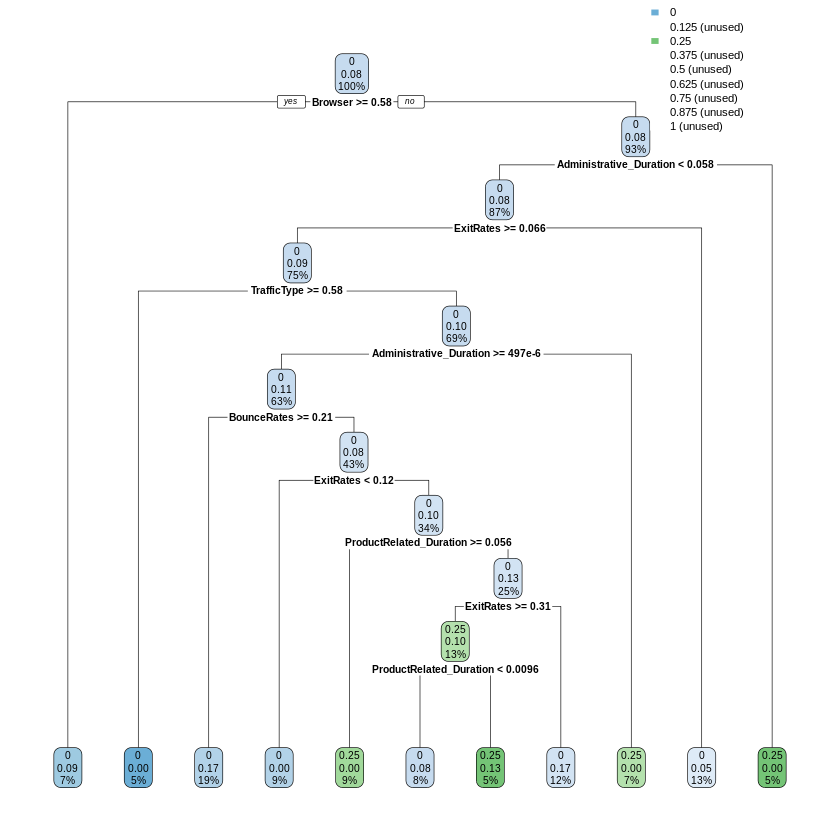

In [46]:
#Fitting and Training the model
install.packages("rpart.plot")
library(rpart)
library(rpart.plot)
fit <- rpart(dia$Region~., data = norm, method = "class")
rpart.plot(fit, extra = 106)

In [49]:
# predict dataset 
prd = predict(fit, test_target(2:16), type  = "class")
prd

ERROR: ignored

In [50]:
accuracy_tune <- function(fit) {
  pred <- predict(fit, dia_test, type = "class")
  table1 <- table(dia_test$Revenue, pred)
  accuracy <- sum(diag(table1))/ sum(table1)
  accuracy
}

In [51]:
rpart.control

function (minsplit = 20L, minbucket = round(minsplit/3), cp = 0.01, 
    maxcompete = 4L, maxsurrogate = 5L, usesurrogate = 2L, xval = 10L, 
    surrogatestyle = 0L, maxdepth = 30L, ...) 
{
    if (maxcompete < 0L) {
        warning("The value of 'maxcompete' supplied is < 0; the value 0 was used instead")
        maxcompete <- 0L
    }
    if (any(xval < 0L)) {
        warning("The value of 'xval' supplied is < 0; the value 0 was used instead")
        xval <- 0L
    }
    if (maxdepth > 30L) 
        stop("Maximum depth is 30")
    if (maxdepth < 1L) 
        stop("Maximum depth must be at least 1")
    if (missing(minsplit) && !missing(minbucket)) 
        minsplit <- minbucket * 3L
    if ((usesurrogate < 0L) || (usesurrogate > 2L)) {
        warning("The value of 'usesurrogate' supplied was out of range, the default value of 2 is used instead.")
        usesurrogate <- 2L
    }
    if ((surrogatestyle < 0L) || (surrogatestyle > 1L)) {
        warning("The value of 'surrogatestyle' supplied was out of range, the default value of 0 is used instead.")
        surrogatestyle <- 0L
    }
    list(minsplit = minsplit, minbucket = minbucket, cp = cp, 
        maxcompete = maxcompete, maxsurrogate = maxsurrogate, 
        usesurrogate = usesurrogate, surrogatestyle = surrogatestyle, 
        maxdepth = maxdepth, xval = xval)
}
<bytecode: 0x5571ed3ef2d8>
<environment: namespace:rpart>

In [52]:
control <- rpart.control(minsplit = 20,
minbucket = round(20/3),
maxdepth = 30,
cp = 0.01)

tuned <- rpart(dia_train$Revenue~., data = dia_train, method = 'class', control = control)
accuracy (tuned)

ERROR: ignored

##SVM

In [53]:
install.packages('kernlab')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [63]:
install.packages('e1071')

library(e1071)
classifier = svm(formula = Purchased ~ .,
                 data = dia_train,
                 type = 'C-classification',
                 kernel = 'linear')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



ERROR: ignored

In [65]:
# Lets fit our data into SVM
install.packages('e1071')
library(e1071)
  
classifier = svm(formula = Informational~ .,
                 data = dia_train,
                 type = 'C-classification',
                 kernel = 'linear')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



ERROR: ignored

##Naive Bayes

In [59]:
# Installing Packages
install.packages("e1071")
install.packages("caTools")
install.packages("caret")
  
# Loading package
library(e1071)
library(caTools)
library(caret)
  
# Splitting data into train
# and test data
split <- sample.split(dia, SplitRatio = 0.7)
train_cl <- subset(dia, split == "TRUE")
test_cl <- subset(dia, split == "FALSE")
  
# Feature Scaling
train_scale <- scale(train_cl[, 1:16])
test_scale <- scale(test_cl[, 1:16])
  
# Fitting Naive Bayes Model 
# to training dataset
set.seed(100)  # Setting Seed
classifier_cl <- naiveBayes(Infromational ~ ., dia_train = train_cl)
classifier_cl
  
# Predicting on test data'
y_pred <- predict(classifier_cl, dia_test= test_cl)
  
# Confusion Matrix
cm <- table(test_cl$Informational, y_pred)
cm
  
# Model Evauation
confusionMatrix(cm)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



ERROR: ignored

In [67]:
library(e1071)
#Default Paramters
nb_default <- naiveBayes(norm~., data=dia_train[,-4])
default_pred <- predict(nb_default, test, type="class")
 
table(default_pred, test$response,dnn=c("Prediction","Actual"))

ERROR: ignored